# 调用即时数据API
options:

* t_type = 0 -> aq ; 1 -> meo
* t_city = 0 -> beijing ; 1 -> london
* t_grid = 0 -> grid_meo_data 

In [2]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm

def get_current_data(month,day,t_type,t_city,t_grid):
    if t_type == 0:
        data_type = 'airquality'
    else:
        data_type = 'meteorology'
    if t_city == 0:
        city_data = 'bj'
    else:
        city_data = 'ld'  
    if t_grid == 1:
        city_data = city_data + '_grid'
   
    time = str(month) + '-' + str(day)
    path = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/'
    url = 'https://biendata.com/competition/'+ data_type + '/'+ city_data +'/2018-' + time + '-0/2018-' + time + '-23/2k0d1d8'    
    respones = requests.get(url) 
    if t_type == 0:
        path = path + str(city_data) +'_aq/'
        target_file = path + city_data + '_aq' + '_2018-' + time + '-0_2018-' + time + '-23.csv'
    else:
        path = path + str(city_data) +'_meo/'
        target_file = path + city_data + '_meo' + '_2018-' + time + '-0_2018-' + time + '-23.csv'
        
    with open (target_file , 'w') as f:
        f.write(respones.text)
    df = pd.read_csv(target_file)
    
    print str(target_file).split(str(path))[1]
    return df.shape

In [11]:
# [0,0,0],[0,1,0],[1,0,0],[1,0,1],[1,1,1]
index = [[1,0,1],[1,1,1]]
for each in index:
    for i in range(30,31):
        if i < 10:
            day = '0' + str(i)
        else:
            day = str(i)
        get_current_data('05',day,each[0],each[1],each[2])

bj_grid_meo_2018-05-30-0_2018-05-30-23.csv
ld_grid_meo_2018-05-30-0_2018-05-30-23.csv


# 历史数据合并

In [12]:
def meige_daily_data(n_month,n_days):
    daily_path = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/'
    pd_bj_aq = daily_path + 'bj_aq/'
    pd_bj_meo = daily_path + 'bj_grid_meo/'
    pd_ld_aq = daily_path + 'ld_aq/'
    pd_ld_meo = daily_path + 'ld_grid_meo/'
    pd_index = [pd_bj_aq,pd_bj_meo,pd_ld_aq,pd_ld_meo]

    for each in pd_index:
        for i in range(n_days):
            if i < 30:
                if i < 9:
                    t_time = str(n_month) + '-' + '0' + str(i + 1)
                else:
                    t_time = str(n_month) + '-' + str(i + 1)
            else:
                if i - 29 < 10:
                    t_time = '05' + '-' + '0' + str(i - 29)
                else:
                    t_time = '05-' + str(i - 29)
            t_path = each + (each.split(daily_path)[1]).split('/')[0] + '_2018-' + t_time + '-0_2018-' + t_time + '-23.csv'
            if i == 0: 
                t_df = pd.read_csv(t_path)
            else:
                t_df = t_df.append(pd.read_csv(t_path))
        print t_df.shape
        t_df.to_csv(each + 'm' + (each.split(daily_path)[1]).split('/')[1] + '_' + str(n_month) + '_' + str(n_days) + '.csv')
    return None

In [34]:
meige_daily_data('04',60)

(46725, 9)
(918486, 9)
(27263, 9)
(1210465, 9)


# 格式转换

* beijing_aq

In [35]:
daily_path = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/'

df_bj_aq = pd.read_csv(daily_path + 'bj_aq/m_04_60.csv')
del df_bj_aq['Unnamed: 0']
if 'id' in list(df_bj_aq.columns):
    del df_bj_aq['id']
df_bj_aq.columns = ['stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2']
df_bj_aq.to_csv(daily_path + 'bj_aq/m_04_60.csv')
df_bj_aq.tail()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
46720,qianmen_aq,2018-05-30 23:00:00,61.0,108.0,77.0,1.5,38.0,12.0
46721,yongdingmennei_aq,2018-05-30 23:00:00,65.0,129.0,88.0,1.4,19.0,7.0
46722,xizhimenbei_aq,2018-05-30 23:00:00,52.0,NaN,100.0,1.2,23.0,5.0
46723,nansanhuan_aq,2018-05-30 23:00:00,90.0,127.0,91.0,1.3,20.0,16.0
46724,dongsihuan_aq,2018-05-30 23:00:00,104.0,128.0,115.0,2.3,7.0,29.0


In [16]:
df_bj_aq.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,44019.000000,36849.000000,44562.000000,44645.000000,44372.000000,44544.000000
mean,60.588996,130.234715,42.182196,0.714488,83.344744,6.015715
std,52.075653,99.546856,28.690830,0.499248,57.737356,7.137139
min,3.000000,6.000000,2.000000,0.100000,2.000000,2.000000
25%,24.000000,65.000000,20.000000,0.400000,40.000000,2.000000
50%,45.000000,112.000000,35.000000,0.600000,77.000000,3.000000
75%,84.000000,170.000000,58.000000,0.900000,113.000000,8.000000
max,705.000000,2030.000000,249.000000,4.800000,342.000000,300.000000


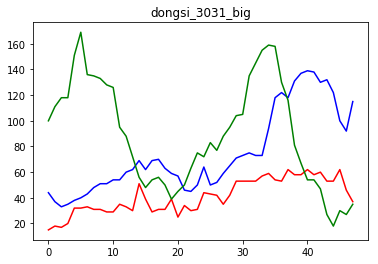

In [317]:
import matplotlib.pyplot as plt
import statistics


a = [15, 18, 17, 20, 32, 32, 33, 31, 31, 29, 29, 35, 33, 30, 51, 39, 29, 31, 31, 39, 25, 34, 30, 31, 44, 43, 42, 35, 42, 53, 53, 53, 53, 57, 59, 54, 53, 62, 58, 58, 62, 58, 60, 53, 53, 62, 46, 37]
b = [44, 37, 33, 35, 38, 40, 43, 48, 51, 51, 54, 54, 60, 62, 69, 62, 69, 70, 63, 59, 57, 46, 45, 50, 64, 50, 52, 59, 65, 71, 73, 75, 73, 73, 94, 118, 122, 118, 131, 137, 139, 138, 130, 132, 122, 100, 92, 115]
c = [100, 111, 118, 118, 151, 169, 136, 135, 133, 128, 126, 95, 88, 72, 56, 48, 54, 56, 50, 39, 45, 50, 63, 75, 72, 83, 77, 88, 95, 104, 105, 135, 145, 155, 159, 158, 130, 116, 81, 67, 54, 54, 47, 27, 18, 30, 27, 35]

plt.plot(a,'r')# base 5  big
plt.plot(b,'b')# xgb 5  small
plt.plot(c,'g')# drop 5


# plt.plot(d,'black')# gbm 10
# plt.plot(e,'pink')# utc 5
# plt.plot(f,'grey')# utc 10

plt.title('dongsi_3031_big')
plt.show()

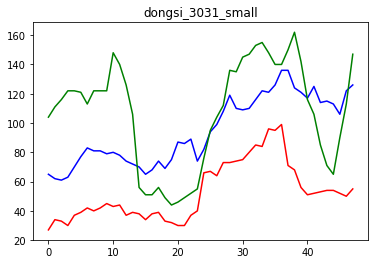

In [318]:
a = [27, 34, 33, 30, 37, 39, 42, 40, 42, 45, 43, 44, 37, 39, 38, 34, 38, 39, 33, 32, 30, 30, 37, 40, 66, 67, 64, 73, 73, 74, 75, 80, 85, 84, 96, 95, 99, 71, 68, 56, 51, 52, 53, 54, 54, 52, 50, 55]
b = [65, 62, 61, 63, 70, 77, 83, 81, 81, 79, 80, 78, 74, 72, 70, 65, 68, 74, 69, 75, 87, 86, 89, 74, 82, 94, 99, 108, 119, 110, 109, 110, 116, 122, 121, 126, 136, 136, 124, 121, 117, 125, 114, 115, 113, 106, 122, 126]
c = [104, 111, 116, 122, 122, 121, 113, 122, 122, 122, 148, 140, 126, 106, 56, 51, 51, 56, 49, 44, 46, 49, 52, 55, 76, 95, 104, 112, 136, 135, 145, 147, 153, 155, 148, 140, 140, 150, 162, 142, 116, 106, 85, 71, 65, 90, 113, 147]

plt.plot(a,'r')# base 5  big
plt.plot(b,'b')# xgb 5  small
plt.plot(c,'g')# drop 5

# plt.plot(d,'black')# gbm 10
# plt.plot(e,'pink')# utc 5
# plt.plot(f,'grey')# utc 10

plt.title('dongsi_3031_small')
plt.show()

* london_aq

In [36]:
df_ld_aq = pd.read_csv(daily_path + 'ld_aq/m_04_60.csv')
del df_ld_aq['Unnamed: 0']
if 'id' in list(df_ld_aq.columns):
    del df_ld_aq['id']
    del df_ld_aq['CO_Concentration']
    del df_ld_aq['O3_Concentration']
    del df_ld_aq['SO2_Concentration']
df_ld_aq.columns = ['station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
df_ld_aq.drop_duplicates('MeasurementDateGMT')
df_ld_aq.to_csv(daily_path + 'ld_aq/m_04_60.csv')
df_ld_aq.tail()

,station_id,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
27258,BX1,2018-05-30 23:00:00,NaN,31.0,11.7
27259,TH4,2018-05-30 23:00:00,NaN,51.3,35.0
27260,ST5,2018-05-30 23:00:00,NaN,26.0,31.9
27261,RB7,2018-05-30 23:00:00,NaN,54.8,16.6
27262,TD5,2018-05-30 23:00:00,18.9,NaN,NaN


In [37]:
p_ld_stp = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/london_station_position.csv'
df_ld_stp = pd.read_csv(p_ld_stp)
stp_station_id = list(df_ld_stp['Station_id'])

# 剔除其他观测点数据
ld_aq_gen = []
ld_aq = df_ld_aq.groupby(['station_id'])
for i in range(13):
    ld_aq_gen.append(ld_aq.get_group(stp_station_id[i]))

for i in range(13):
    if i == 0:
        df = ld_aq_gen[i]
    else:
        df = df.append(ld_aq_gen[i])

df.to_csv(daily_path + 'ld_aq/m_04_60.csv')
df.tail()

,station_id,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
27171,MY7,2018-05-30 19:00:00,28.5,33.0,NaN
27190,MY7,2018-05-30 20:00:00,31.4,37.8,NaN
27209,MY7,2018-05-30 21:00:00,34.8,41.9,NaN
27228,MY7,2018-05-30 22:00:00,41.5,49.7,NaN
27247,MY7,2018-05-30 23:00:00,50.5,64.7,NaN


In [19]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
count,14541.000000,15913.000000,14530.000000
mean,16.681968,24.564042,40.258238
std,12.391101,14.250281,26.660233
min,-9.400000,-1.800000,-5.000000
25%,7.800000,14.100000,20.100000
50%,13.000000,21.600000,34.600000
75%,22.000000,31.800000,54.900000
max,100.700000,252.000000,223.900000


* beijing_grid_meo

In [21]:
df = pd.read_csv('/home/lifuzhen/KDD2018/Beijing_historical_meo_grid.csv')
station2position = {}
station_id = list(df['stationName'])
longitude = list(df['longitude'])
latitude = list(df['latitude'])
for i in range(651):
    t_key = str(station_id[i])
    station2position.setdefault(t_key,[]).append(round(longitude[i],2))
    station2position.setdefault(t_key,[]).append(round(latitude[i],2))

In [40]:
import numpy as np

df_bj_grid = pd.read_csv(daily_path + 'bj_grid_meo/m_04_60.csv')
if 'id' in list(df_bj_grid.columns):
    del df_bj_grid['id']

sid = list(df_bj_grid['station_id'])
s_utc_time = list(df_bj_grid['time'])
s_temperature = list(df_bj_grid['temperature'])
s_pressure = list(df_bj_grid['pressure'])
s_humidity = list(df_bj_grid['humidity'])
s_wind_direction = list(df_bj_grid['wind_direction'])
s_wind_speed = list(df_bj_grid['wind_speed'])

s_longitude,s_latitude = [],[]
for each in sid:
    s_longitude.append(station2position[each][0])
    s_latitude.append(station2position[each][1])

df_bj_meo = []
index = [sid,s_longitude,s_latitude,s_utc_time,s_temperature,s_pressure,s_humidity,s_wind_direction,s_wind_speed]
for each in index:
    df_bj_meo.append(each)
       
c_index = ['stationName', 'longitude', 'latitude', 'utc_time', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
df_bj_meo_full = pd.DataFrame(np.transpose(df_bj_meo) ,index = None, columns = c_index)
df_bj_meo_full.fillna(method = 'ffill')
df_bj_meo_full.to_csv(daily_path + 'bj_grid_meo/m_04_60.csv')
df_bj_meo_full.tail()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
918481,beijing_grid_646,118.0,40.6,2018-05-30 23:00:00,15.0,953.0137,53.0,335.8,5.81
918482,beijing_grid_647,118.0,40.7,2018-05-30 23:00:00,15.0,957.6644,53.0,328.97,5.43
918483,beijing_grid_648,118.0,40.8,2018-05-30 23:00:00,15.0,959.0803,53.0,326.91,5.54
918484,beijing_grid_649,118.0,40.9,2018-05-30 23:00:00,16.0,957.2614,52.0,329.89,6.07
918485,beijing_grid_650,118.0,41.0,2018-05-30 23:00:00,16.0,955.4424,52.0,332.37,6.62


* london_grid_meo

In [23]:
df1 = pd.read_csv('/home/lifuzhen/KDD2018/London_historical_meo_grid.csv')
s2p = {}
station_id = list(df1['stationName'])
longitude = list(df1['longitude'])
latitude = list(df1['latitude'])
for i in range(861):
    t_key = str(station_id[i])
    s2p.setdefault(t_key,[]).append(round(longitude[i],2))
    s2p.setdefault(t_key,[]).append(round(latitude[i],2))

In [39]:
df_ld_grid = pd.read_csv(daily_path + 'ld_grid_meo/m_04_60.csv')
del df_ld_grid['id']

sid = list(df_ld_grid['station_id'])
s_utc_time = list(df_ld_grid['time'])
s_temperature = list(df_ld_grid['temperature'])
s_pressure = list(df_ld_grid['pressure'])
s_humidity = list(df_ld_grid['humidity'])
s_wind_direction = list(df_ld_grid['wind_direction'])
s_wind_speed = list(df_ld_grid['wind_speed'])

s_longitude,s_latitude = [],[]
for each in sid:
    s_longitude.append(s2p[each][0])
    s_latitude.append(s2p[each][1])

df_ld_meo = []
index = [sid,s_longitude,s_latitude,s_utc_time,s_temperature,s_pressure,s_humidity,s_wind_direction,s_wind_speed]
for each in index:
    df_ld_meo.append(each)
       
c_index = ['stationName', 'longitude', 'latitude', 'utc_time', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
df_ld_meo_full = pd.DataFrame(np.transpose(df_ld_meo) ,index = None, columns = c_index)
df_ld_meo_full.fillna(method = 'ffill')
df_ld_meo_full.to_csv(daily_path + 'ld_grid_meo/m_04_60.csv')
df_ld_meo_full.tail()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
1210460,london_grid_856,2.0,52.1,2018-05-30 19:00:00,16.59,1014.1452,86.0,117.51,4.53
1210461,london_grid_857,2.0,52.2,2018-05-30 19:00:00,16.46,1014.1493,86.0,127.88,5.22
1210462,london_grid_858,2.0,52.3,2018-05-30 19:00:00,16.37,1014.1598,86.0,134.17,6.05
1210463,london_grid_859,2.0,52.4,2018-05-30 19:00:00,16.31,1014.1767,86.0,137.62,6.93
1210464,london_grid_860,2.0,52.5,2018-05-30 19:00:00,16.24,1014.1936,86.0,140.28,7.83


# 获取天气预报

$BEIJING$

In [26]:
df = pd.read_csv('/home/lifuzhen/KDD2018/Beijing_historical_meo_grid.csv')
station2position = {}
station_id = list(df['stationName'])
longitude = list(df['longitude'])
latitude = list(df['latitude'])
for i in range(651):
    t_key = str(station_id[i])
    station2position.setdefault(t_key,[]).append(round(longitude[i],2))
    station2position.setdefault(t_key,[]).append(round(latitude[i],2))

In [27]:
url = 'http://kdd.caiyunapp.com/competition/forecast/bj/2018-05-31-00/2k0d1d8'
target = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/bj_weather/2018-05-31-00.csv'
respones = requests.get(url) 
with open (target , 'w') as f:
    f.write(respones.text)
df = pd.read_csv(target)
df.tail()

,id,station_id,forecast_time,weather,temperature,pressure,humidity,wind_speed,wind_direction
31243,137485612,beijing_grid_650,2018-06-01 20:00:00,CLEAR_NIGHT,17.00,951.669425,49.0,2.57,98.79
31244,137485613,beijing_grid_650,2018-06-01 21:00:00,CLEAR_NIGHT,17.00,951.673594,50.0,2.49,97.55
31245,137485614,beijing_grid_650,2018-06-01 22:00:00,CLEAR_NIGHT,18.80,951.727972,48.0,2.22,92.24
31246,137485615,beijing_grid_650,2018-06-01 23:00:00,CLEAR_NIGHT,21.23,951.752960,44.0,1.66,93.56
31247,137485616,beijing_grid_650,2018-06-02 00:00:00,CLEAR_NIGHT,23.95,951.659531,39.0,1.20,144.90


In [28]:
df_bj_grid = pd.read_csv(target)
if 'id' in list(df_bj_grid.columns):
    del df_bj_grid['id']

sid = list(df_bj_grid['station_id'])
s_utc_time = list(df_bj_grid['forecast_time'])
s_temperature = list(df_bj_grid['temperature'])
s_pressure = list(df_bj_grid['pressure'])
s_humidity = list(df_bj_grid['humidity'])
s_wind_direction = list(df_bj_grid['wind_direction'])
s_wind_speed = list(df_bj_grid['wind_speed'])

s_longitude,s_latitude = [],[]
for each in sid:
    s_longitude.append(station2position[each][0])
    s_latitude.append(station2position[each][1])

df_bj_meo = []
index = [sid,s_longitude,s_latitude,s_utc_time,s_temperature,s_pressure,s_humidity,s_wind_direction,s_wind_speed]
for each in index:
    df_bj_meo.append(each)
       
c_index = ['stationName', 'longitude', 'latitude', 'utc_time', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
df_bj_meo_full = pd.DataFrame(np.transpose(df_bj_meo) ,index = None, columns = c_index)
df_bj_meo_full.fillna(method = 'ffill')
df_bj_meo_full.to_csv(target)
df_bj_meo_full.tail()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
31243,beijing_grid_650,118.0,41.0,2018-06-01 20:00:00,17.0,951.669424786,49.0,98.79,2.57
31244,beijing_grid_650,118.0,41.0,2018-06-01 21:00:00,17.0,951.67359375,50.0,97.55,2.49
31245,beijing_grid_650,118.0,41.0,2018-06-01 22:00:00,18.8,951.727971954,48.0,92.24,2.22
31246,beijing_grid_650,118.0,41.0,2018-06-01 23:00:00,21.23,951.752960075,44.0,93.56,1.66
31247,beijing_grid_650,118.0,41.0,2018-06-02 00:00:00,23.95,951.65953125,39.0,144.9,1.2


In [29]:
from tqdm import tqdm
p_bj_stp = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/bj_station_position.csv'
df_bj_stp = pd.read_csv(p_bj_stp)

stp_longitude = list(df_bj_stp['longitude'])
stp_latitude = list(df_bj_stp['latitude'])
stp_station_id = list(df_bj_stp['stationId'])

# 按照坐标分组
df1 = pd.read_csv(target)
bj_meo_gen = []
bj_meo = df1.groupby(["longitude","latitude"])
for i in tqdm(range(35)):
    bj_meo_gen.append(bj_meo.get_group((round(stp_longitude[i],1),round(stp_latitude[i],1))).drop(['stationName'],axis=1))

# 按坐标对应的网格数据生成观测点气象数据
for i in range(35):
    bj_meo_gen[i].drop(['longitude','latitude','utc_time'],axis = 1, inplace = True)
    bj_meo_gen[i][['temperature','pressure','humidity','wind_direction','wind_speed/kph']].to_csv( '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/bj_weather/' + str(stp_station_id[i].split('_aq')[0]) + '.csv')

100%|██████████| 35/35 [00:00<00:00, 889.54it/s]


$LONDON$

In [30]:
df1 = pd.read_csv('/home/lifuzhen/KDD2018/London_historical_meo_grid.csv')
s2p = {}
station_id = list(df1['stationName'])
longitude = list(df1['longitude'])
latitude = list(df1['latitude'])
for i in range(861):
    t_key = str(station_id[i])
    s2p.setdefault(t_key,[]).append(round(longitude[i],2))
    s2p.setdefault(t_key,[]).append(round(latitude[i],2))

In [31]:
url = 'http://kdd.caiyunapp.com/competition/forecast/ld/2018-05-31-00/2k0d1d8'
target = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/ld_weather/2018-05-31-00.csv'
respones = requests.get(url) 
with open (target , 'w') as f:
    f.write(respones.text)
df = pd.read_csv(target)
df.tail()

,id,station_id,forecast_time,weather,temperature,pressure,humidity,wind_speed,wind_direction
41323,137547604,london_grid_860,2018-06-01 20:00:00,CLOUDY,16.43,1018.033116,90.0,10.13,167.83
41324,137547605,london_grid_860,2018-06-01 21:00:00,CLOUDY,16.29,1018.121562,90.0,9.20,171.97
41325,137547606,london_grid_860,2018-06-01 22:00:00,CLOUDY,16.05,1017.999307,91.0,7.87,182.73
41326,137547607,london_grid_860,2018-06-01 23:00:00,CLOUDY,15.78,1017.760739,92.0,7.08,203.69
41327,137547608,london_grid_860,2018-06-02 00:00:00,CLOUDY,15.54,1017.547500,93.0,8.04,228.38


In [32]:
df_ld_grid = pd.read_csv(target)
del df_ld_grid['id']

sid = list(df_ld_grid['station_id'])
s_utc_time = list(df_ld_grid['forecast_time'])
s_temperature = list(df_ld_grid['temperature'])
s_pressure = list(df_ld_grid['pressure'])
s_humidity = list(df_ld_grid['humidity'])
s_wind_direction = list(df_ld_grid['wind_direction'])
s_wind_speed = list(df_ld_grid['wind_speed'])

s_longitude,s_latitude = [],[]
for each in sid:
    s_longitude.append(s2p[each][0])
    s_latitude.append(s2p[each][1])

df_ld_meo = []
index = [sid,s_longitude,s_latitude,s_utc_time,s_temperature,s_pressure,s_humidity,s_wind_direction,s_wind_speed]
for each in index:
    df_ld_meo.append(each)
       
c_index = ['stationName', 'longitude', 'latitude', 'utc_time', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
df_ld_meo_full = pd.DataFrame(np.transpose(df_ld_meo) ,index = None, columns = c_index)
df_ld_meo_full.fillna(method = 'ffill')
df_ld_meo_full.to_csv(target)
df_ld_meo_full.tail()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
41323,london_grid_860,2.0,52.5,2018-06-01 20:00:00,16.43,1018.03311612,90.0,167.83,10.13
41324,london_grid_860,2.0,52.5,2018-06-01 21:00:00,16.29,1018.1215625,90.0,171.97,9.2
41325,london_grid_860,2.0,52.5,2018-06-01 22:00:00,16.05,1017.99930673,91.0,182.73,7.87
41326,london_grid_860,2.0,52.5,2018-06-01 23:00:00,15.78,1017.76073859,92.0,203.69,7.08
41327,london_grid_860,2.0,52.5,2018-06-02 00:00:00,15.54,1017.5475,93.0,228.38,8.04


In [33]:
p_ld_stp = '/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/london_station_position.csv'
df_ld_stp = pd.read_csv(p_ld_stp)

stp_longitude = list(df_ld_stp['Longitude'])
stp_latitude = list(df_ld_stp['Latitude'])
stp_station_id = list(df_ld_stp['Station_id'])

# 按照坐标分组
df = pd.read_csv(target)
ld_meo_gen = []
ld_meo = df.groupby(["longitude","latitude"])
for i in tqdm(range(13)):
    ld_meo_gen.append(ld_meo.get_group((round(stp_longitude[i],1),round(stp_latitude[i],1))).drop(['stationName'],axis=1))

# 按坐标对应的网格数据生成观测点气象数据
for i in range(13):
    ld_meo_gen[i].drop(['longitude','latitude','utc_time'],axis = 1, inplace = True)
    ld_meo_gen[i].to_csv('/home/liyouru/.ipython/profile_myserver/dataset/KDD_Cup2018/daily_data/ld_weather/' + str(stp_station_id[i]) + '.csv')

100%|██████████| 13/13 [00:00<00:00, 58.44it/s]
